<a href="https://colab.research.google.com/github/amalmon/RETAIL-SALES-PREDICTION/blob/main/AMAL_Rossmann_Sales_Prediction_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <b><u> Project Title : Sales Prediction : Predicting sales of a major store chain Rossmann</u></b>

## <b> Problem Description </b>

### Rossmann operates over 3,000 drug stores in 7 European countries. Currently, Rossmann store managers are tasked with predicting their daily sales for up to six weeks in advance. Store sales are influenced by many factors, including promotions, competition, school and state holidays, seasonality, and locality. With thousands of individual managers predicting sales based on their unique circumstances, the accuracy of results can be quite varied.

### You are provided with historical sales data for 1,115 Rossmann stores. The task is to forecast the "Sales" column for the test set. Note that some stores in the dataset were temporarily closed for refurbishment.

## <b> Data Description </b>

### <b>Rossmann Stores Data.csv </b> - historical data including Sales
### <b>store.csv </b> - supplemental information about the stores


### <b><u>Data fields</u></b>
### Most of the fields are self-explanatory. The following are descriptions for those that aren't.

* #### Id - an Id that represents a (Store, Date) duple within the test set
* #### Store - a unique Id for each store
* #### Sales - the turnover for any given day (this is what you are predicting)
* #### Customers - the number of customers on a given day
* #### Open - an indicator for whether the store was open: 0 = closed, 1 = open
* #### StateHoliday - indicates a state holiday. Normally all stores, with few exceptions, are closed on state holidays. Note that all schools are closed on public holidays and weekends. a = public holiday, b = Easter holiday, c = Christmas, 0 = None
* #### SchoolHoliday - indicates if the (Store, Date) was affected by the closure of public schools
* #### StoreType - differentiates between 4 different store models: a, b, c, d
* #### Assortment - describes an assortment level: a = basic, b = extra, c = extended
* #### CompetitionDistance - distance in meters to the nearest competitor store
* #### CompetitionOpenSince[Month/Year] - gives the approximate year and month of the time the nearest competitor was opened
* #### Promo - indicates whether a store is running a promo on that day
* #### Promo2 - Promo2 is a continuing and consecutive promotion for some stores: 0 = store is not participating, 1 = store is participating
* #### Promo2Since[Year/Week] - describes the year and calendar week when the store started participating in Promo2
* #### PromoInterval - describes the consecutive intervals Promo2 is started, naming the months the promotion is started anew. E.g. "Feb,May,Aug,Nov" means each round starts in February, May, August, November of any given year for that store

##### libraries

In [123]:
import pandas as pd
import numpy as np
from pandas import datetime as dt
from pandas import Series,DataFrame
# data visualization
import matplotlib.pyplot as plt
import seaborn as sns 
%matplotlib inline

from sklearn.model_selection import train_test_split
# machine learning
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge, Lasso
from sklearn.preprocessing import PolynomialFeatures
from sklearn.tree import DecisionTreeRegressor
from sklearn import model_selection


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  This is separate from the ipykernel package so we can avoid doing imports until


#####taking data

In [226]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [227]:
rossmann_store_data= pd.read_csv('/content/drive/MyDrive/Almabetter/capstone projects/Capstone project 2 ML regression /Rossmann Stores Data.csv')

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:3326: DtypeWarning: Columns (7) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [228]:
store_data=pd.read_csv('/content/drive/MyDrive/Almabetter/capstone projects/Capstone project 2 ML regression /store.csv')

In [229]:
rossmann_df=rossmann_store_data.copy()

In [230]:
store_df=store_data.copy()

#####basic analysis on data

In [ ]:
rossmann_df

In [ ]:
store_df

In [ ]:
rossmann_df.info()

In [ ]:
store_df.info()

In [ ]:
rossmann_df.describe(include='all')

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
count,1.017209e+06,1.017209e+06,1017209,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1017209,1.017209e+06
unique,NaN,NaN,942,NaN,NaN,NaN,NaN,5,NaN
top,NaN,NaN,2015-07-31,NaN,NaN,NaN,NaN,0,NaN
freq,NaN,NaN,1115,NaN,NaN,NaN,NaN,855087,NaN
mean,5.584297e+02,3.998341e+00,NaN,5.773819e+03,6.331459e+02,8.301067e-01,3.815145e-01,NaN,1.786467e-01
std,3.219087e+02,1.997391e+00,NaN,3.849926e+03,4.644117e+02,3.755392e-01,4.857586e-01,NaN,3.830564e-01
min,1.000000e+00,1.000000e+00,NaN,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,NaN,0.000000e+00
25%,2.800000e+02,2.000000e+00,NaN,3.727000e+03,4.050000e+02,1.000000e+00,0.000000e+00,NaN,0.000000e+00
50%,5.580000e+02,4.000000e+00,NaN,5.744000e+03,6.090000e+02,1.000000e+00,0.000000e+00,NaN,0.000000e+00
75%,8.380000e+02,6.000000e+00,NaN,7.856000e+03,8.370000e+02,1.000000e+00,1.000000e+00,NaN,0.000000e+00


In [ ]:
store_df.describe(include='all')

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
count,1115.00000,1115,1115,1112.000000,761.000000,761.000000,1115.000000,571.000000,571.000000,571
unique,NaN,4,3,NaN,NaN,NaN,NaN,NaN,NaN,3
top,NaN,a,a,NaN,NaN,NaN,NaN,NaN,NaN,"Jan,Apr,Jul,Oct"
freq,NaN,602,593,NaN,NaN,NaN,NaN,NaN,NaN,335
mean,558.00000,NaN,NaN,5404.901079,7.224704,2008.668857,0.512108,23.595447,2011.763573,NaN
std,322.01708,NaN,NaN,7663.174720,3.212348,6.195983,0.500078,14.141984,1.674935,NaN
min,1.00000,NaN,NaN,20.000000,1.000000,1900.000000,0.000000,1.000000,2009.000000,NaN
25%,279.50000,NaN,NaN,717.500000,4.000000,2006.000000,0.000000,13.000000,2011.000000,NaN
50%,558.00000,NaN,NaN,2325.000000,8.000000,2010.000000,1.000000,22.000000,2012.000000,NaN
75%,836.50000,NaN,NaN,6882.500000,10.000000,2013.000000,1.000000,37.000000,2013.000000,NaN


#####**for duplicate row**

In [ ]:
len(rossmann_df[rossmann_df.duplicated()])

0

In [ ]:
len(store_df[store_df.duplicated()])

0

In [ ]:
rossmann_df.DayOfWeek.value_counts()

5    145845
4    145845
3    145665
2    145664
1    144730
7    144730
6    144730
Name: DayOfWeek, dtype: int64

In [ ]:
rossmann_df.Open.value_counts()

1    844392
0    172817
Name: Open, dtype: int64

#####**For null values**

In [ ]:
rossmann_df.isnull().any()

Store            False
DayOfWeek        False
Date             False
Sales            False
Customers        False
Open             False
Promo            False
StateHoliday     False
SchoolHoliday    False
dtype: bool

In [ ]:
store_df.isnull().any()

In [ ]:
store_df.isnull().sum()

Store                          0
StoreType                      0
Assortment                     0
CompetitionDistance            3
CompetitionOpenSinceMonth    354
CompetitionOpenSinceYear     354
Promo2                         0
Promo2SinceWeek              544
Promo2SinceYear              544
PromoInterval                544
dtype: int64

In [ ]:
store_df.loc[store_df['CompetitionOpenSinceMonth'].isnull()]

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
11,12,a,c,1070.0,NaN,NaN,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
12,13,d,a,310.0,NaN,NaN,1,45.0,2009.0,"Feb,May,Aug,Nov"
15,16,a,c,3270.0,NaN,NaN,0,NaN,NaN,NaN
18,19,a,c,3240.0,NaN,NaN,1,22.0,2011.0,"Mar,Jun,Sept,Dec"
21,22,a,a,1040.0,NaN,NaN,1,22.0,2012.0,"Jan,Apr,Jul,Oct"
...,...,...,...,...,...,...,...,...,...,...
1095,1096,a,c,1130.0,NaN,NaN,1,10.0,2014.0,"Mar,Jun,Sept,Dec"
1099,1100,a,a,540.0,NaN,NaN,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
1112,1113,a,c,9260.0,NaN,NaN,0,NaN,NaN,NaN
1113,1114,a,c,870.0,NaN,NaN,0,NaN,NaN,NaN


**. Here we can understand that null values of competition since month & year is due to missing data why because they have fare values under competition distance.**

**. so, It doesn't mean that there is no competition**

In [ ]:
store_df.loc[store_df['CompetitionDistance'].isnull()]

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
290,291,d,a,NaN,NaN,NaN,0,NaN,NaN,NaN
621,622,a,c,NaN,NaN,NaN,0,NaN,NaN,NaN
878,879,d,a,NaN,NaN,NaN,1,5.0,2013.0,"Feb,May,Aug,Nov"


#####**. Here we can assume that these 3 stores have no competitors**

So, we can replace NaN values of copetition distance column with maximum value of competition distance available in data
And also we can replace NaN values of column competition since month and year with mode values of the respective columns

In [ ]:
store_df['CompetitionDistance'].max()

75860.0

In [ ]:
store_df['CompetitionDistance'].min()

20.0

In [ ]:
store_df['CompetitionDistance'].mean()

5404.901079136691

In [ ]:
store_df['CompetitionDistance'].median()

2325.0

*here may be no competetors at all for the shopes with null values of competition distance bt based on that when we applying maximum values there is a increase in outliers in column value. so, we choose mean.
and also it will not make significant changes in dataset

##### manipulations

In [245]:
#1## null vales of column CompetitionDistance replaced by mean value
store_df['CompetitionDistance'].fillna(store_df['CompetitionDistance'].mean(), inplace = True)

In [246]:
#checking
store_df.loc[290]
# understanding values of CompetitionOpenSinceMonth
store_df.CompetitionOpenSinceMonth.value_counts()

9     479
4      94
11     92
3      70
7      67
12     64
10     61
6      50
5      44
2      41
8      39
1      14
Name: CompetitionOpenSinceMonth, dtype: int64

In [247]:
#taking mode value of CompetitionOpenSinceMonth
store_df.CompetitionOpenSinceMonth.mode()[0]

9

In [248]:
#2## replacing null values of CompetitionOpenSinceMonth column with its mode value
store_df['CompetitionOpenSinceMonth'].fillna(store_df.CompetitionOpenSinceMonth.mode()[0], inplace = True)

In [249]:
#3## replacing null values of CompetitionOpenSinceYear with mode value
store_df['CompetitionOpenSinceYear'].fillna(store_df.CompetitionOpenSinceYear.mode()[0], inplace = True)

In [250]:
#checking the changes happen
store_df.info()
#understanding promo2 column values and its counts
store_df.Promo2.value_counts()
#for mode value of Promo2SinceWeek
store_df.Promo2SinceWeek.mode()
#understanding Promo2SinceWeek column values and its counts
store_df.Promo2SinceWeek.value_counts()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1115 entries, 0 to 1114
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Store                      1115 non-null   int64  
 1   StoreType                  1115 non-null   object 
 2   Assortment                 1115 non-null   object 
 3   CompetitionDistance        1115 non-null   float64
 4   CompetitionOpenSinceMonth  1115 non-null   int64  
 5   CompetitionOpenSinceYear   1115 non-null   int64  
 6   Promo2                     1115 non-null   int64  
 7   Promo2SinceWeek            1115 non-null   float64
 8   Promo2SinceYear            1115 non-null   float64
 9   PromoInterval              1115 non-null   object 
dtypes: float64(3), int64(4), object(3)
memory usage: 87.2+ KB


0.0     544
14.0     81
40.0     77
31.0     44
10.0     42
5.0      39
37.0     35
1.0      35
13.0     34
45.0     34
22.0     33
18.0     29
35.0     25
9.0      14
27.0     11
36.0     10
48.0      9
39.0      6
23.0      5
44.0      3
6.0       1
26.0      1
50.0      1
49.0      1
28.0      1
Name: Promo2SinceWeek, dtype: int64

In [251]:
store_df.loc[store_df['Promo2SinceWeek'].isnull()]

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval


**.Here we can conform that the stores which do not participate in promo2 they do not have 
any values in promo2 since yr & month and also promo2 interval**

**. so we can replace the NaN values of promo2 since [yr& month] and promo 2 interval with value 'zero'**

In [252]:
''' imparting zero value to the null values
in columns promo2 since [yr& month] and promo 2 interval in the rows which contain zero value in promo2 column'''

' imparting zero value to the null values\nin columns promo2 since [yr& month] and promo 2 interval in the rows which contain zero value in promo2 column'

In [253]:
store_df.shape[0]

1115

* null values of  promo2 since [yr& month] and promo 2 interval can be also directly make it as 'zero' 

In [254]:
#4## replacing null values of column Promo2SinceYear & PromoInterval with zero
store_df['Promo2SinceWeek'].fillna(0,inplace=True)
store_df['Promo2SinceYear'].fillna(0,inplace=True)
store_df['PromoInterval'].fillna(0,inplace=True)


In [255]:
#df=df.mask(df==0).fillna(df.mean())

In [256]:
store_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1115 entries, 0 to 1114
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Store                      1115 non-null   int64  
 1   StoreType                  1115 non-null   object 
 2   Assortment                 1115 non-null   object 
 3   CompetitionDistance        1115 non-null   float64
 4   CompetitionOpenSinceMonth  1115 non-null   int64  
 5   CompetitionOpenSinceYear   1115 non-null   int64  
 6   Promo2                     1115 non-null   int64  
 7   Promo2SinceWeek            1115 non-null   float64
 8   Promo2SinceYear            1115 non-null   float64
 9   PromoInterval              1115 non-null   object 
dtypes: float64(3), int64(4), object(3)
memory usage: 87.2+ KB


In [257]:
#5##
store_df['CompetitionOpenSinceYear']=store_df['CompetitionOpenSinceYear'].astype(int)
store_df['CompetitionOpenSinceMonth']=store_df['CompetitionOpenSinceMonth'].astype(int)

In [258]:
store_df.CompetitionOpenSinceMonth.value_counts()

9     479
4      94
11     92
3      70
7      67
12     64
10     61
6      50
5      44
2      41
8      39
1      14
Name: CompetitionOpenSinceMonth, dtype: int64

#####**feature engineering**

######competition since

In [259]:
#6# making new column by combining competition since month and year (date assumed to be 15)
store_df['competition_since'] =pd.to_datetime(store_df['CompetitionOpenSinceYear'].astype(str)+'-'+store_df['CompetitionOpenSinceMonth'].astype(str))

In [260]:
#7
del store_df['CompetitionOpenSinceMonth']
#8
del store_df['CompetitionOpenSinceYear']

In [261]:
#9 merging 2 datasets on store number

final_df = rossmann_df.merge(store_df,how='inner',on = ['Store'])

In [262]:
#10  converting object typ of column 'date' to date time for subtract with 'competition since'
final_df['Date']=pd.to_datetime(final_df['Date'])

In [263]:
#11
final_df['competition_since_before'] =(final_df['Date']-final_df['competition_since'])

In [264]:
#12
del final_df['competition_since']

In [265]:
#not necessary we can use normalization
#final_df['competition_since_before']=final_df['competition_since_before']/np.timedelta64(1,'M')

In [266]:
#13 timedelta object typ become to float
final_df['competition_since_before']=final_df['competition_since_before']/np.timedelta64(1,'D')

In [267]:
#14 all negative values of 'competition_since_before' convert to 0 value, why because it means that the competition not started
final_df.loc[final_df['competition_since_before']<0,'competition_since_before']=0

######promo2 since

In [268]:
#16
final_df['Promo2SinceWeek']=final_df['Promo2SinceWeek'].astype(int)

final_df['Promo2SinceYear']=final_df['Promo2SinceYear'].astype(int)

In [269]:
#17
final_df['promo2month']=final_df['Promo2SinceWeek']/4

In [270]:
#18
final_df['promo2month']=final_df['promo2month'].astype(int)

In [271]:
#19
final_df.loc[final_df['promo2month']==0,'promo2month']=1

In [272]:
final_df['promo2month'].value_counts()

1     577209
3     102810
10     62598
2      51280
9      46754
7      40918
5      33036
11     31910
4      27318
8      22814
6      10568
12      9994
Name: promo2month, dtype: int64

In [273]:
#20 converting to 'str' format for convenience to make change the zero values of 'Promo2SinceYear' column
final_df['Date']=final_df['Date'].astype(str)

In [274]:
#21  all zero values of 'Promo2SinceYear' changed to year of date
final_df['Promo2SinceYear']=final_df['Promo2SinceYear'].mask(final_df['Promo2SinceYear']==0).fillna(final_df['Date'].str[0:4])

In [275]:
#22   coverting back to date time format
final_df['Date']=pd.to_datetime(final_df['Date'])

In [276]:
#23  for removing floating points from 'Promo2SinceYear'
final_df['Promo2SinceYear']=final_df['Promo2SinceYear'].astype(int)

In [277]:
#24 for a new column
final_df['Promo2_since_date']=pd.to_datetime(final_df['Promo2SinceYear'].astype(str)+'-'+final_df['promo2month'].astype(str))

In [278]:
#25
final_df['Promo2_since']=(final_df['Date']-final_df['Promo2_since_date'])

In [279]:
#26
del final_df['Promo2_since_date']

In [ ]:
final_df

So, we can say that the negative values of 'Promo2_since' conveys that , promo2 not started in the perticular date

In [281]:
#27
final_df['Promo2_since']=final_df['Promo2_since']/np.timedelta64(1,'D')

In [282]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1017209 entries, 0 to 1017208
Data columns (total 19 columns):
 #   Column                    Non-Null Count    Dtype         
---  ------                    --------------    -----         
 0   Store                     1017209 non-null  int64         
 1   DayOfWeek                 1017209 non-null  int64         
 2   Date                      1017209 non-null  datetime64[ns]
 3   Sales                     1017209 non-null  int64         
 4   Customers                 1017209 non-null  int64         
 5   Open                      1017209 non-null  int64         
 6   Promo                     1017209 non-null  int64         
 7   StateHoliday              1017209 non-null  object        
 8   SchoolHoliday             1017209 non-null  int64         
 9   StoreType                 1017209 non-null  object        
 10  Assortment                1017209 non-null  object        
 11  CompetitionDistance       1017209 non-null  float6

In [283]:
#27   making negative values of 'Promo2_since'to zero
final_df.loc[final_df['Promo2_since']<0,'Promo2_since']=0

droping data points of shopes which are not open

1.   why beacuse sales will be zero





In [284]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1017209 entries, 0 to 1017208
Data columns (total 19 columns):
 #   Column                    Non-Null Count    Dtype         
---  ------                    --------------    -----         
 0   Store                     1017209 non-null  int64         
 1   DayOfWeek                 1017209 non-null  int64         
 2   Date                      1017209 non-null  datetime64[ns]
 3   Sales                     1017209 non-null  int64         
 4   Customers                 1017209 non-null  int64         
 5   Open                      1017209 non-null  int64         
 6   Promo                     1017209 non-null  int64         
 7   StateHoliday              1017209 non-null  object        
 8   SchoolHoliday             1017209 non-null  int64         
 9   StoreType                 1017209 non-null  object        
 10  Assortment                1017209 non-null  object        
 11  CompetitionDistance       1017209 non-null  float6

In [285]:
#droping rows with data of value 'Open'=0
final_df=final_df[final_df['Open']!=0]
del final_df['Open']

### **visualization**

In [ ]:
final_df.info()

#####**Day of week v/s sales**

######catplot

In [ ]:
#a=sns.load_dataset('final_df')
sns.catplot(data=final_df,x='DayOfWeek',y='Sales')

######barplot

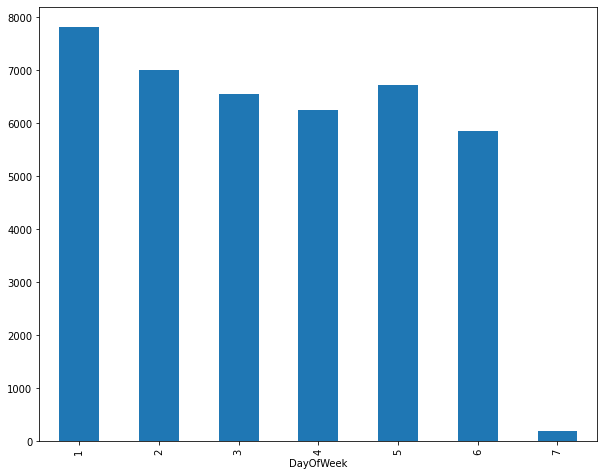

In [ ]:
bplt1=final_df.groupby(['DayOfWeek'])['Sales'].mean().plot.bar(figsize=(10,8))

*sales varying in between 6000 to 8000 with respect to week days

#####**open v/s sales**

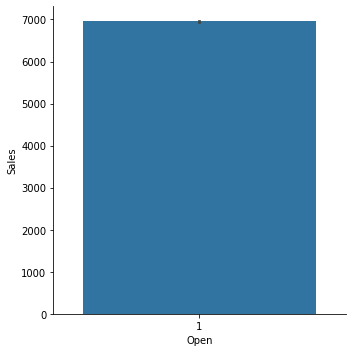

In [201]:
sns.catplot(data=final_df,x='Open',y='Sales',kind='bar')

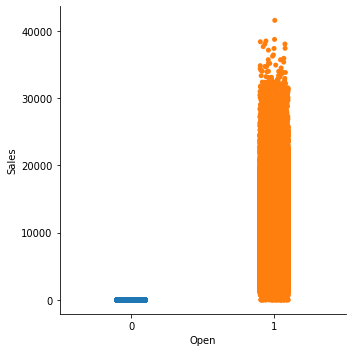

In [ ]:
sns.catplot(data=final_df,x='Open',y='Sales')

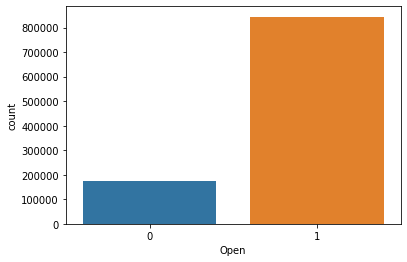

In [ ]:
#df=sns.load_dataset('final_df')
sns.countplot(x=final_df['Open'])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


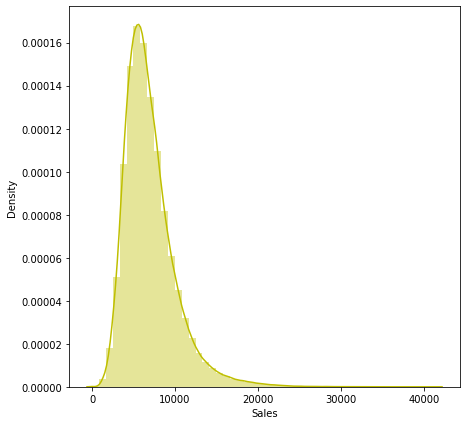

In [208]:
plt.figure(figsize=(7,7))
sns.distplot(final_df['Sales'],color="y")

In [210]:
numeric_features = final_df.describe().columns
numeric_features

Index(['Store', 'DayOfWeek', 'Sales', 'Customers', 'Open', 'Promo',
       'SchoolHoliday', 'CompetitionDistance', 'Promo2', 'Promo2SinceWeek',
       'Promo2SinceYear', 'competition_since_before', 'promo2month',
       'Promo2_since'],
      dtype='object')

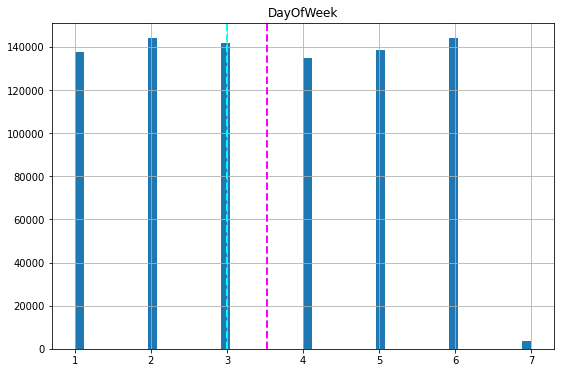

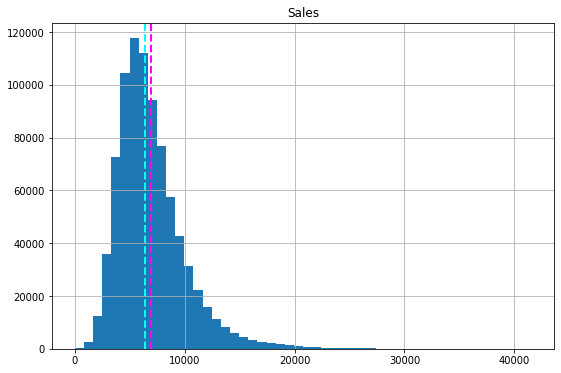

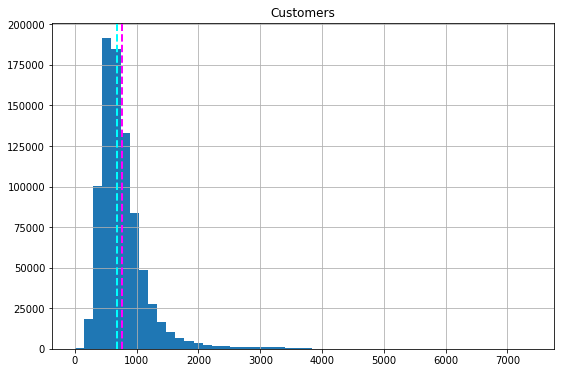

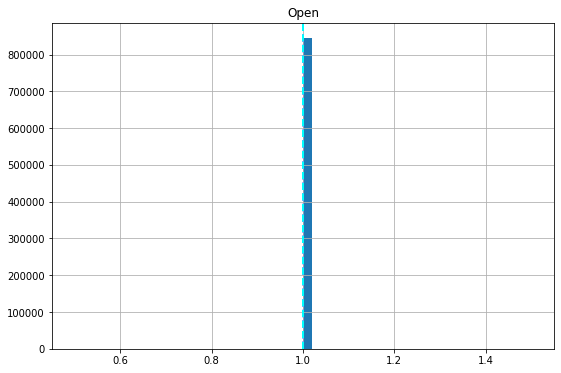

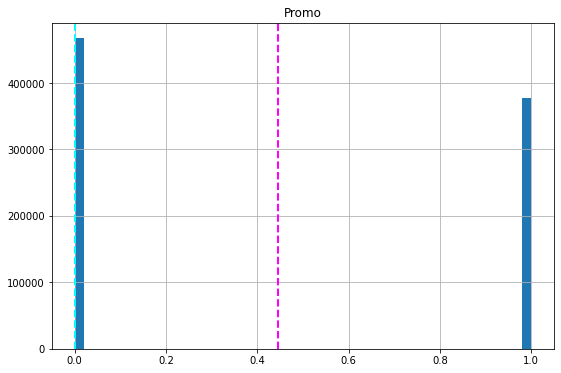

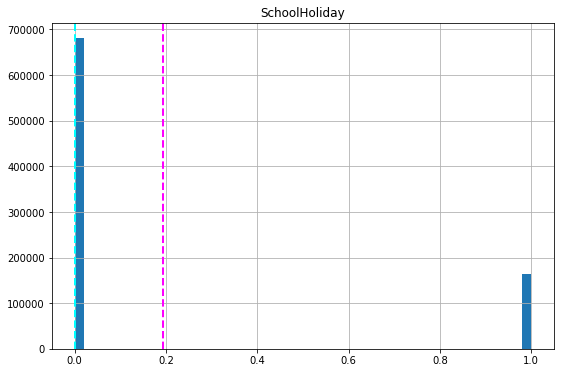

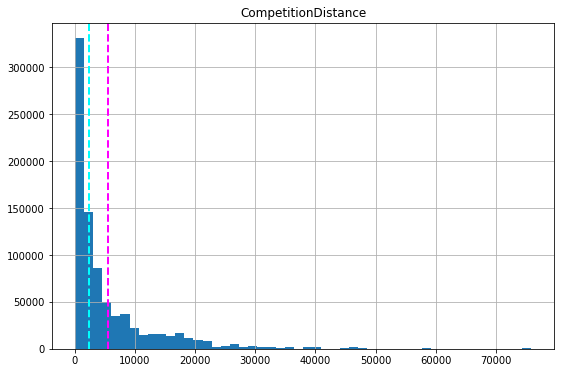

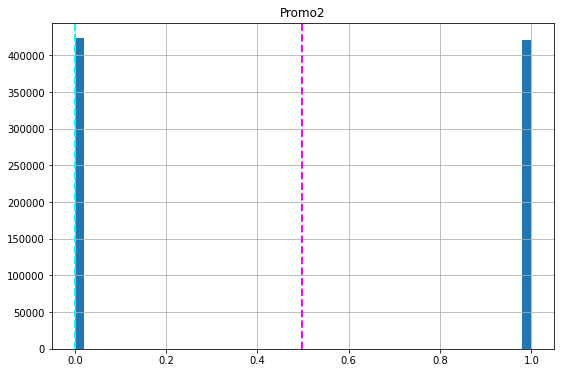

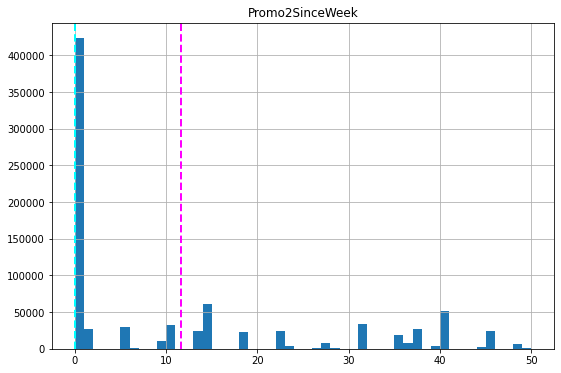

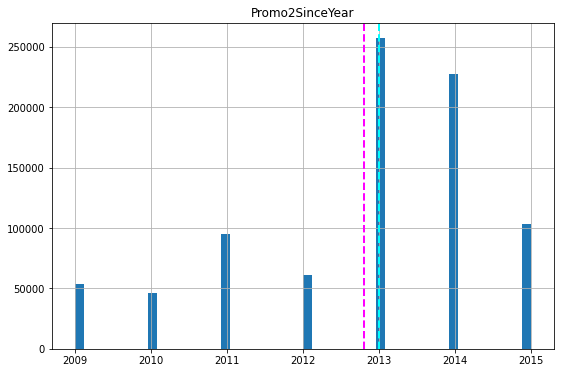

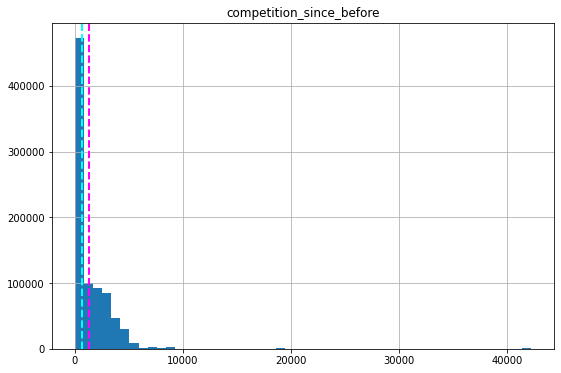

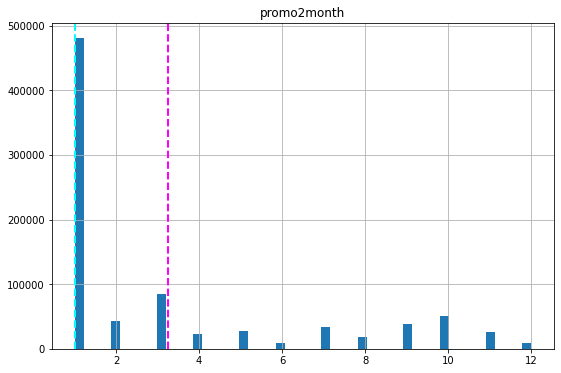

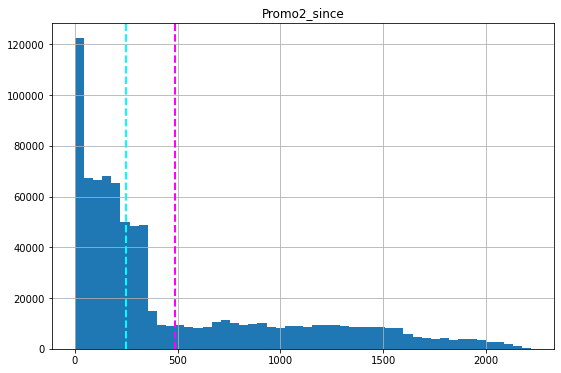

In [212]:
for col in numeric_features[1:]:
    fig = plt.figure(figsize=(9, 6))
    ax = fig.gca()
    feature = final_df[col]
    feature.hist(bins=50, ax = ax)
    ax.axvline(feature.mean(), color='magenta', linestyle='dashed', linewidth=2)
    ax.axvline(feature.median(), color='cyan', linestyle='dashed', linewidth=2)    
    ax.set_title(col)
plt.show()

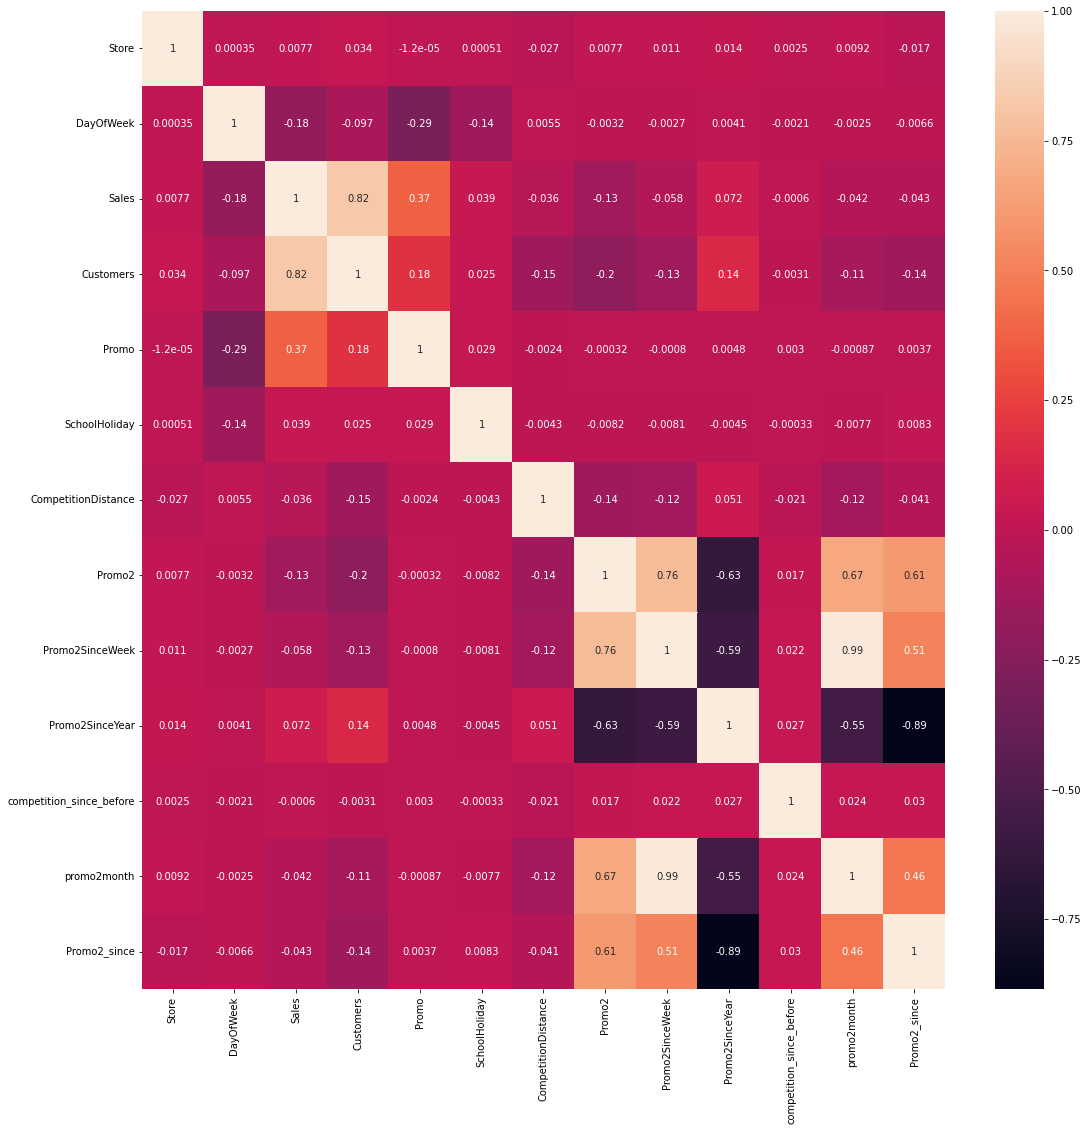

In [218]:
plt.figure(figsize=(15,15))
sns.heatmap(final_df.corr(),annot=True)

In [220]:
del final_df['Promo2SinceWeek']
del final_df['Promo2SinceYear']
del final_df['promo2month']

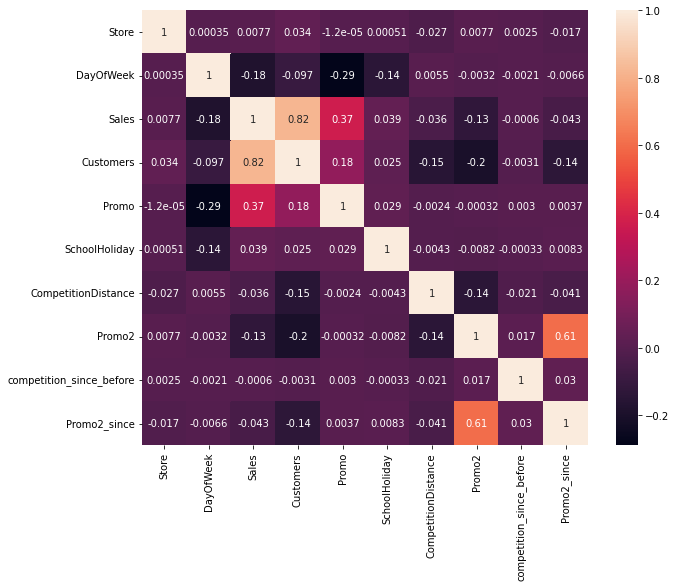

In [225]:
plt.figure(figsize=(10,8))
sns.heatmap(final_df.corr(),annot=True)

***onehot encoding***

In [ ]:
#making dummies for chatagorical columns
store_df=pd.get_dummies(store_df,columns=['StoreType','Assortment','PromoInterval'])

In [ ]:
store_df

In [ ]:
rossmann_df.SchoolHoliday.value_counts()

0    835488
1    181721
Name: SchoolHoliday, dtype: int64

In [ ]:
rossmann_df.StateHoliday.value_counts()

0    855087
0    131072
a     20260
b      6690
c      4100
Name: StateHoliday, dtype: int64

In [ ]:
rossmann_df=pd.get_dummies(rossmann_df,columns=['StateHoliday'])

In [ ]:
rossmann_df

In [ ]:
rossmann_store_data.value_counts

In [ ]:
rossmann_df.info()

In [ ]:
store_df.info()

In [ ]:
rossmann_df.info()

In [ ]:
store_df

In [ ]:
final_df.drop('PromoInterval_0',axis=1,inplace=True)

In [ ]:
rossmann_df["Date"]=pd.to_datetime(rossmann_df["Date"])
#final_df["Year"]=final_df["Date"].dt.year
#final_df["Month"]=final_df["Date"].dt.month
#final_df["Day"]=final_df["Date"].dt.day
#final_df["Week"]=final_df["Date"].dt.week%4

In [ ]:
'''#creating bar plot of promo intervel with averg. sales
ax=final_df.groupby(['PromoInterval'])['Sales'].sum().plot.bar(figsize=(15,5),fontsize=15)

#giving tittle
ax.set_title('average sales versus promotion intervals',fontsize=15)'''




In [ ]:
rossmann_df.info()

In [ ]:
final_df

In [ ]:
final_df.info()

In [ ]:
final_df

In [ ]:
final_df

In [ ]:
#taking difference of date and competition since date and making a single column with competition starts before how many days


Here we have promo since week and year.
we have to convert it into a date format 

Here week represents number of week in a calender year so, we have to convert it into month and day

In [ ]:
plt.scatterplot